In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')

Found 21 distinct cell lines


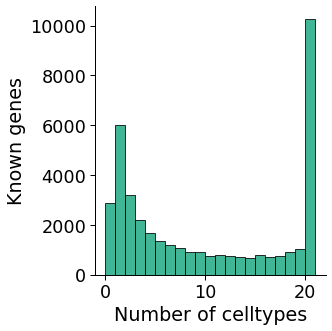

In [3]:
plot_biosamp_det(df, how='gene',
                 sample='cell_line',
                 opref='figures/')

Found 21 distinct cell lines


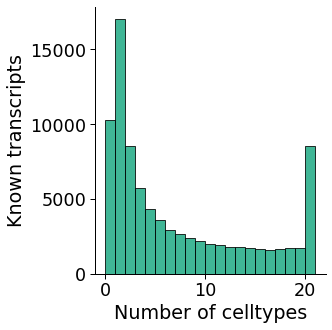

In [5]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 nov='Known',
                 opref='figures/')

In [8]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')

Found 21 distinct cell lines


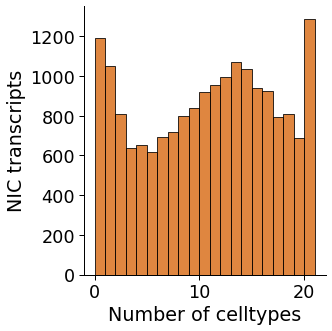

In [9]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 nov='NIC',
                 opref='figures/')

Found 21 distinct cell lines


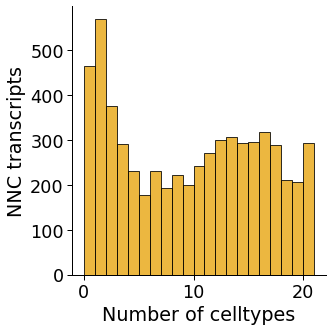

In [10]:
plot_biosamp_det(df, how='iso',
                 sample='cell_line',
                 nov='NNC',
                 opref='figures/')

In [3]:
how = 'gene'
sample = 'cell_line'

In [4]:
df = rm_sirv_ercc(df)
    
dataset_cols = get_sample_datasets(sample)

if how == 'iso':
    df.set_index('annot_transcript_id', inplace=True)
    df = df.loc[df.transcript_novelty == nov]
    df = df[dataset_cols]

# sum up counts across the same gene
if how == 'gene':
    # only known genes
    df = df.loc[df.gene_novelty == 'Known']
    df = df[dataset_cols+['annot_gene_id']]
    df = df.groupby('annot_gene_id').sum()

df = df.transpose()
df.reset_index(inplace=True)
df.rename({'index': 'dataset'}, axis=1, inplace=True)

# get the celltype
df['celltype'] = df.dataset.str.rsplit('_', n=2, expand=True)[0]

if sample == 'tissue':

    # add in the tissue metadata
#     d = os.path.dirname(__file__)
#     fname = '{}/../refs/tissue_metadata.csv'.format(d)
    fname = '../../refs/tissue_metadata.csv'
    tissue = pd.read_csv(fname)
    df = df.merge(tissue[['biosample', 'tissue']],
                    how='left', left_on='celltype',
                    right_on='biosample')
    df.drop('celltype', axis=1, inplace=True)
    df.rename({'tissue': 'celltype'}, axis=1, inplace=True)
    print('Found {} distinct tissues'.format(len(df.celltype.unique())))
else:
    print('Found {} distinct cell lines'.format(len(df.celltype.unique())))   

df.drop(['dataset'], axis=1, inplace=True)

# sum over celltype
df = df.groupby('celltype').sum()
temp = df.copy(deep=True)

Found 21 distinct cell lines


In [5]:
temp.head()

annot_gene_id,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,...,ENSG00000285981.1,ENSG00000285982.1,ENSG00000285984.1,ENSG00000285985.1,ENSG00000285986.1,ENSG00000285987.1,ENSG00000285988.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1
celltype,,,,,,,,,,,,,,,,,,,,,
gm12878,1,0,905,90,510,783,0,948,58,153,...,0,34,1,0,1,1,0,1,0,0
h9,1280,8,322,35,296,0,0,1271,137,214,...,0,20,0,0,0,0,44,0,4,0
h9_chondro,134,0,76,25,24,0,201,384,45,79,...,0,4,0,0,0,0,0,0,23,0
h9_de,1143,13,153,71,245,1,0,850,83,282,...,0,9,0,0,0,0,3,0,0,0
h9_neural_crest,610,2,180,47,193,0,0,456,14,106,...,0,13,0,0,0,0,0,0,1,0


In [43]:
# convert counts to bools
temp = temp.astype(bool)
temp.head()

annot_gene_id,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,...,ENSG00000285981.1,ENSG00000285982.1,ENSG00000285984.1,ENSG00000285985.1,ENSG00000285986.1,ENSG00000285987.1,ENSG00000285988.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1
celltype,,,,,,,,,,,,,,,,,,,,,
gm12878,True,False,True,True,True,True,False,True,True,True,...,False,True,True,False,True,True,False,True,False,False
h9,True,True,True,True,True,False,False,True,True,True,...,False,True,False,False,False,False,True,False,True,False
h9_chondro,True,False,True,True,True,False,True,True,True,True,...,False,True,False,False,False,False,False,False,True,False
h9_de,True,True,True,True,True,True,False,True,True,True,...,False,True,False,False,False,False,True,False,False,False
h9_neural_crest,True,True,True,True,True,False,False,True,True,True,...,False,True,False,False,False,False,False,False,True,False


In [45]:
temp.index.name = None
temp.head()


annot_gene_id,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,...,ENSG00000285981.1,ENSG00000285982.1,ENSG00000285984.1,ENSG00000285985.1,ENSG00000285986.1,ENSG00000285987.1,ENSG00000285988.1,ENSG00000285990.1,ENSG00000285991.1,ENSG00000285992.1
gm12878,True,False,True,True,True,True,False,True,True,True,...,False,True,True,False,True,True,False,True,False,False
h9,True,True,True,True,True,False,False,True,True,True,...,False,True,False,False,False,False,True,False,True,False
h9_chondro,True,False,True,True,True,False,True,True,True,True,...,False,True,False,False,False,False,False,False,True,False
h9_de,True,True,True,True,True,True,False,True,True,True,...,False,True,False,False,False,False,True,False,False,False
h9_neural_crest,True,True,True,True,True,False,False,True,True,True,...,False,True,False,False,False,False,False,False,True,False


In [90]:
temp.shape

(21, 39285)

In [114]:
# temp2 = temp.transpose()
# ind_cols = temp2.columns.tolist()
# temp2.reset_index(inplace=True)
# # # temp2.set_index(ind_cols, inplace=True)
# # # temp2.rename({'annot_gene_id': 'index'}, axis=1, inplace=True)
# temp2 = temp2.groupby(ind_cols).count()
# # temp2.head()
# # temp2.set_index(ind_cols, inplace=True)
# temp2.sort_values(by='annot_gene_id', ascending=False)
# temp2 = temp2.iloc[0:20, :]
# print(len(temp2))
# # temp2 = temp2.annot_gene_id

In [117]:
temp2 = temp.transpose()
ind_cols = temp2.columns.tolist()
temp2.reset_index(inplace=True)

In [124]:
# temp2.reset_index(inplace=True)
temp2['n_samples'] = temp2[ind_cols].sum(1)

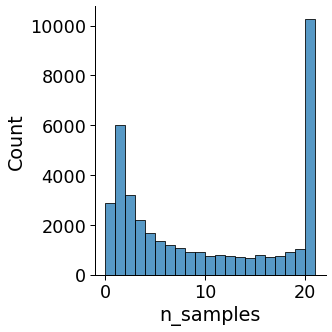

In [125]:
# histogram of number of biosamples this shows up in 
sns.set_context('paper', font_scale=2)
sns.displot(data=temp2, x='n_samples', kind='hist', binwidth=1)

In [96]:
blot = upsetplot.UpSet(temp2, subset_size='auto',
                       show_counts='%d', sort_by='cardinality', 
                       min_degree=2)
blot.plot()

TypeError: __init__() got an unexpected keyword argument 'min_degree'

In [82]:
plt.show()

In [65]:
from upsetplot import generate_counts

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

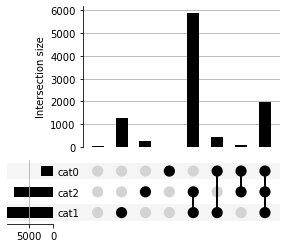

In [85]:
example = generate_counts()
type(example)
example
from upsetplot import plot
plot(example)

In [57]:
plt.show()

In [83]:
f = plt.gcf()
fname = 'test.png'
f.savefig(fname, dpi=300, bbox_inches='tight')  

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_upset_plot(bulk, sc, opref, gtf=None, \
                    kind='gene', novelty='Known'):
    
    sns.set_context('paper', font_scale=1)    
    
    sc_datasets = get_dataset_names(sc)
    bulk_datasets = get_dataset_names(bulk)
    sample_df = get_sample_df(sc_datasets+bulk_datasets)

    # colors
    known_green = '#009E73'
    nnc_gold = '#E69F00'
    nic_orange = '#D55E00'
    
    if novelty == 'Known':
        color = known_green
    elif novelty == 'NNC':
        color = nnc_gold
    elif novelty == 'NIC':
        color = nic_orange

    # df is table with counts, df_copy is df right before groupby and counting
    if novelty != 'Known':
        gtf = None
    df, df_copy = make_counts_table(bulk, sc, sample_df, gtf, kind=kind, novelty=novelty)
    
    # what column?
    if kind == 'gene':
        id_col = 'annot_gene_id'
        len_col = 'Gene length'
        df_copy.rename({'len': len_col}, axis=1, inplace=True)  
    elif kind == 'transcript':
        id_col = 'annot_transcript_id'
        len_col = 'Transcript length'
        df_copy.rename({'len': len_col}, axis=1, inplace=True)
    if novelty == 'Known':
        nov = 'known'
    elif novelty == 'NNC':
        nov = 'NNC'
    elif novelty == 'NIC':
        nov = 'NIC'
        
    ylab = 'Number of {} {}s'.format(nov, kind)
          
    # plot de plot
    blot = upsetplot.UpSet(df_copy, subset_size='auto', show_counts='%d', sort_by='cardinality')
    
    if novelty == 'Known':
        blot.add_catplot(value=len_col, kind='box', color=color, fliersize=1, linewidth=1)
        
    ax_dict = blot.plot()
    ax_dict['intersections'].set_ylabel(ylab)
    
    if novelty == 'Known':
#         ax_dict['extra1'].set_ylim((-10000,200000))
        ax_dict['extra1'].set_yscale('log')

#         blot.plot()

    f = plt.gcf()
    fname = '{}_{}_{}_detection_upset.pdf'.format(opref, novelty, kind)
    f.savefig(fname, dpi=300, bbox_inches='tight')  
        
    return(df, df_copy)